In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
import json
import powerlaw

# Importing and Cleaning data

In [3]:
def cleanDf(df):
    # Dropping NaNs
    df.columns = ['Recipient', 'Supplier','Year of order', 'Year of order estimate','Number ordered', 
                  'Number ordered estimate', 'Weapon designation', 'Weapon description', 'Number delivered',
                    'Number delivered estimate', 'Year(s) of delivery', 'status', 'Comments', 'SIPRI TIV per unit',
                      'SIPRI TIV for total order', 'SIPRI TIV of delivered weapons']
    
    df['Year of order estimate'] = df['Year of order estimate'].notna()
    df['Number ordered estimate'] = df['Number ordered estimate'].notna()
    df['Number delivered estimate'] = df['Number delivered estimate'].notna()


    df = df.dropna(subset=['Number ordered','Number delivered','Year of order'])
    df['Number ordered'] = df['Number ordered'].astype('int')
    df['Number delivered'] = df['Number delivered'].astype('int')
    df['Year of order'] = df['Year of order'].astype('int')
    #df['Delivery start'] = df['Year(s) of delivery'].str.split(';').min()
    #df['Delivery end'] = df['Year(s) of delivery'].str.split(';').max()


    #Removing nonstate actors
    df = df[~df['Recipient'].str.contains('\*') & ~df['Supplier'].str.contains('\*')]

    #RESTRICT FOR YEARS [subject to change]
    df = df[df['Year of order'] >2001]

    #RESTRICT FOR NEW OR MODERNIZED
    df = df[df['status'] == 'New']

    return df

In [4]:
aircraft_df = cleanDf(pd.read_csv("data/aircraft.csv",encoding='Latin1'))
armoured_vehicle_df = cleanDf(pd.read_csv("data/armoured_vehicle.csv",encoding='Latin1'))

In [23]:
aircraft_df.head(1)

,Recipient,Supplier,Year of order,Year of order estimate,Number ordered,Number ordered estimate,Weapon designation,Weapon description,Number delivered,Number delivered estimate,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
1,Afghanistan,Brazil,2013,False,20,False,EMB-314 Super Tucano,trainer/combat aircraft,20,True,2016,New,$427 m 'LAS' deal (financed by USA); A-29B ver...,4.5,90.0,90.0


# Creating Network From Edgelist


In [5]:
def create_network(df:pd.DataFrame,nodelist:set) -> nx.digraph:
    df = df[['Recipient','Supplier']]

    df = df[df['Recipient'].isin(nodelist) & df['Supplier'].isin(nodelist)]
    df = df.drop_duplicates()
    
    network =  nx.from_pandas_edgelist(df, 'Supplier', 'Recipient', create_using=nx.DiGraph())
    network.add_nodes_from(nodelist)
    return network

In [6]:
with open('nodelist/nodelist_2001.json','r') as json_file:
    nodelist_budgets = json.load(json_file)
nodelist = set(nodelist_budgets.keys())

In [7]:
aircraft_graph = create_network(aircraft_df, nodelist)
vehicle_graph = create_network(armoured_vehicle_df,nodelist)

## Examining in-degrees and out-degrees

In [8]:
def powerlaw_test(data):

    #CITE https://pypi.org/project/powerlaw/

    results = powerlaw.Fit(data)
    print(results.power_law.alpha)
    print(results.power_law.xmin)
    R, p = results.distribution_compare('power_law', 'lognormal')
    print(p)

    return results

In [20]:
def plot_degree_distributions(net):
    in_degrees = dict(net.in_degree())
    out_degrees = dict(net.out_degree())

    #filtering out zeros
    in_degrees = [in_degrees[country] for country in in_degrees if in_degrees[country]>0]
    out_degrees = [out_degrees[country] for country in out_degrees if out_degrees[country]>0]


    plt.figure(figsize=(5, 5))
    in_degree_hist = plt.hist(in_degrees, bins=range(0,max(in_degrees) + 2,1), alpha=0.5, color='blue', label='In-degree')
    plt.xlabel('In-degree')
    plt.ylabel('Frequency')
    plt.title('Distribution of (nonzero) In-degrees')
    plt.grid(True)

    plt.yscale('log')
    plt.xscale('log')


    plt.legend()
    plt.show()

    plt.figure(figsize=(5, 5))
    out_degree_hist = plt.hist(out_degrees, bins=range(0,max(out_degrees) + 6,5), alpha=0.5, color='red', label='Out-degree')
    plt.xlabel('Out-degree')
    plt.ylabel('Frequency')
    plt.title('Distribution of (nonzero) Out-degrees')
    plt.grid(True)

    plt.yscale('log')
    plt.xscale('log')
    
    plt.legend()
    plt.show()

    powerlaw_test(list(in_degrees))
    powerlaw_test(list(out_degrees))


    return in_degree_hist,out_degree_hist

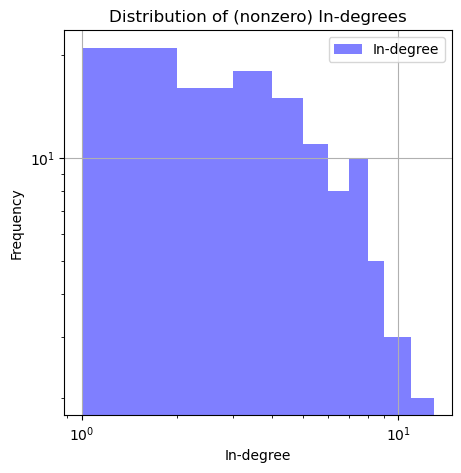

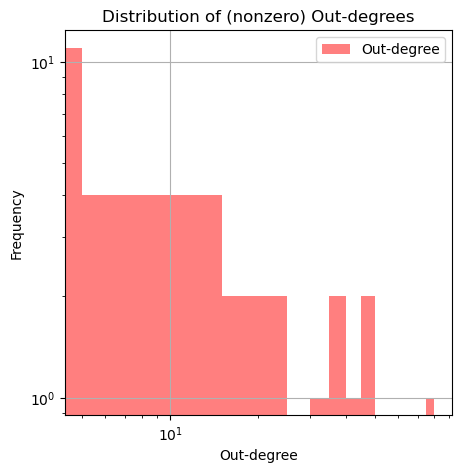

Calculating best minimal value for power law fit
6.588355065983542%
7.0
0.8901930511451704
Calculating best minimal value for power law fit
6.038763858859085%
38.0
0.2089443142204499


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


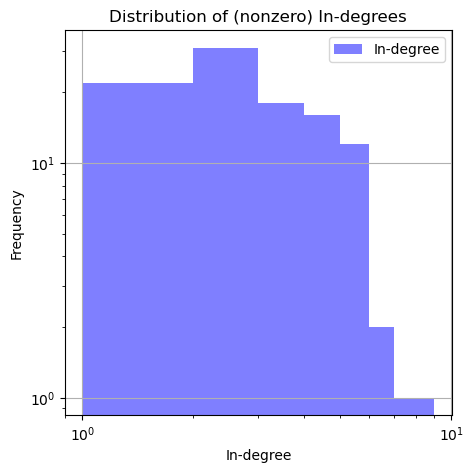

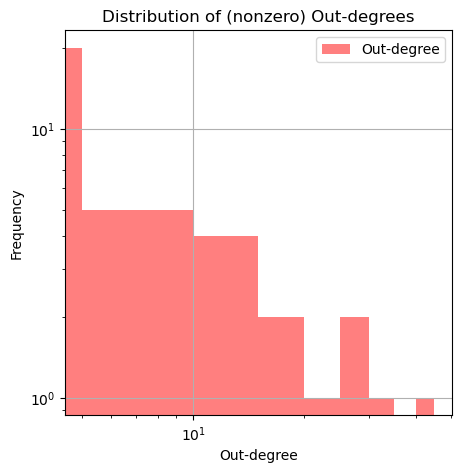

Calculating best minimal value for power law fit
14.662147297320562
5.0
0.2136826378412452
Calculating best minimal value for power law fit
2.508358233418085%
8.0
0.49412002601651583


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


((array([ 0., 22., 31., 18., 16., 12.,  2.,  1.,  1.]),
  array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
  <BarContainer object of 9 artists>),
 (array([20.,  5.,  4.,  2.,  1.,  2.,  1.,  0.,  1.]),
  array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
  <BarContainer object of 9 artists>))

In [21]:
plot_degree_distributions(aircraft_graph)
plot_degree_distributions(vehicle_graph)

## Power Law Goodness of Fit Test

## Rank-Correlation with GDP

In [11]:
def calculate_correlation():


SyntaxError: incomplete input (402286391.py, line 1)